In [623]:
# %matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

Load and Format File 

In [624]:

raw_data = np.load(r"C:\Users\quant\SynologyDrive\09 Data\Fridge Data\Qubit\20240521_DR4_5Q4C_0430#7\06 second compensation\20240616_1806_target_q4_crosstalk_q3_ramsey_z_pulse_zlinecrosstalk_0.001.npz", allow_pickle=True)# ["arr_0"].item()
other_info = {}
for k, v in raw_data.items():
    print(k, v.shape)
    if k in ["paras","setting"]:
        other_info[k]=v.item()

for k, v in other_info.items():
    print(k)

d_z_target_amp = other_info["paras"]["d_z_target_amp"]
d_z_crosstalk_amp = other_info["paras"]["d_z_crosstalk_amp"]

# Create a 2D numpy array (example data)
data = raw_data["q4_ro"][0]

d_z_target_amp = d_z_target_amp[:]
d_z_crosstalk_amp = d_z_crosstalk_amp[45:]
data = data[:, 45:]

print(data.shape, d_z_target_amp.shape, d_z_crosstalk_amp.shape)


q4_ro (2, 3200, 101)
setting ()
paras ()
setting
paras
(3200, 56) (3200,) (56,)


In [625]:
from qcat.zline_crosstalk.ramsey_2dfft import analysis_crosstalk_value

analysis_crosstalk_value(d_z_crosstalk_amp, d_z_target_amp, data.transpose())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (2056, 5200)
length: 2056, delta:0.0039999999999995595
length: 5200, delta:3.999999999998796e-06
Maximum value: 0.4247638558359653
f_z_target: -0.121595330739313
f_z_crosstalk: -240.38461538468772
k space: 1976.9230769234541
crosstalk: -0.0005058365758753899


(-0.0005058365758753899,
 [array([-125.        , -124.87840467, -124.75680934, ...,  124.63521401,
          124.75680934,  124.87840467]),
  array([-125000.00000004, -124951.92307696, -124903.84615388, ...,
          124855.76923081,  124903.84615388,  124951.92307696])],
 array([[0.00103753, 0.00121885, 0.00060846, ..., 0.00042106, 0.00060846,
         0.00121885],
        [0.00103912, 0.00117131, 0.00061657, ..., 0.00043874, 0.00060018,
         0.00126144],
        [0.00104388, 0.00111918, 0.00062446, ..., 0.0004543 , 0.00059177,
         0.00129882],
        ...,
        [0.00105178, 0.00133078, 0.00058329, ..., 0.00035996, 0.00063207,
         0.00106295],
        [0.00104388, 0.00129882, 0.00059177, ..., 0.00038084, 0.00062446,
         0.00111918],
        [0.00103912, 0.00126144, 0.00060018, ..., 0.00040155, 0.00061657,
         0.00117131]]))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (2056, 5200)
length: 2056, delta:0.0039999999999995595
length: 5200, delta:3.999999999998796e-06
Maximum value: 0.4247638558359653
f_z_target: -0.121595330739313
f_z_crosstalk: -240.38461538468772
k space: 1976.9230769234541
crosstalk: -0.0005058365758753899


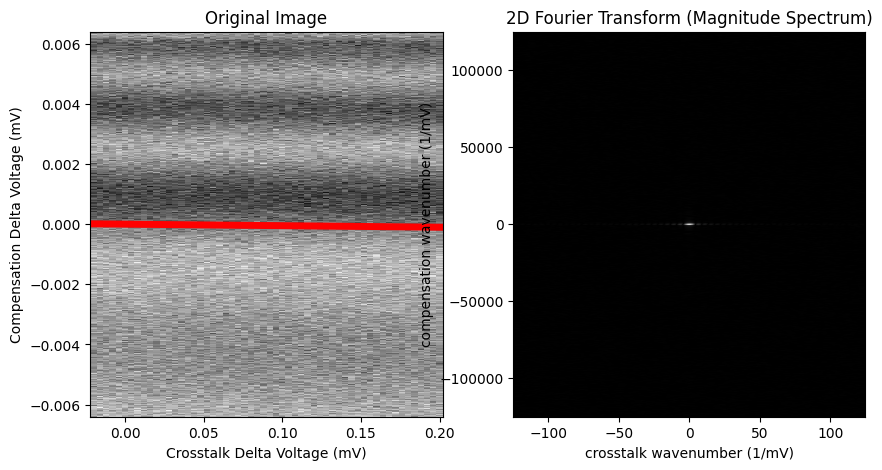

In [626]:

from qcat.visualization.zline_crosstalk import plot_analysis
plot_analysis(d_z_crosstalk_amp, d_z_target_amp, data.transpose())

plt.show()

In [627]:
crosstalk_matrix = [
    [1. , 0.0005660682516576603  , -0.00031351472399501187 , -0.0008380724334031946 , -0.0004190362167015973],
    [0.0010618126659081386   , 1.    , -0.0003380009657170537 , -0.0013752455795675105 , -0.0010948191593351951],
    [0.001210549070471281   , 0.001210549070471281  , 1.    , 0.0004085603112840573 , -0.0005500982318271263],
    [0.0011673151750973066   , 0.0011673151750973066  , -0.001300578034681826  , 1.    , -0.00044117647058824686],
    [0.00048638132295721114   , 0.0010700389105058644  , -0.0024987986544920005  , 0.0005058365758753899 , 1.],
]
cancel_matrix = np.linalg.inv(crosstalk_matrix)
print(cancel_matrix)
[
    [1., 0.019101793163227933 , 0.007400970564034268, -0.006508453051829961  , -0.010415087536721896, -0.01233164690015178 , -0.012029863644126419, -0.01380905335010071 , -0.012368349658446206],
    [0., 1. , 0., 0.  , 0., 0. , 0., 0. , 0.],
    [0.023928106398805868, 0.07237848652466582   , 1., -0.03188100001681708    , -0.016610996569762837, -0.01981791892937278 , -0.015786691698146973, -0.018956270280269617 , -0.01443740180941646],
    [0., 0. , 0., 1.  , 0., 0. , 0., 0. , 0.],
    [0.017303387280268364, 0.021204202732861915   , 0.019667825293721183, 0.04394408110426139  , 1., -0.04739067570067405    , -0.020312672024662866, -0.017232972982063288 , -0.011956655206285012],
    [0., 0. , 0., 0.  , 0., 1. , 0., 0. , 0.],
    [0.019990248659192026, 0.021705116290011484   , 0.016587653142733808, 0.01735502930941727  , 0.019786266530016597, 0.043092751600656454  , 1., -0.062318998079111995    , -0.028125814973979476],
    [0., 0. , 0., 0.  , 0., 0. , 0., 1. , 0.],
    [0.016485464803359655, 0.013781434089534486   , 0.010903771995922922, 0.010534051935324211  , 0.010124931139071286, 0.003180266832144186  , -0.004398533822059109, 0.03339866078719304 , 1.],
]


[[ 9.99999039e-01 -5.67875737e-04  3.15458853e-04  8.37691586e-04
   4.18957196e-04]
 [-1.06436258e-03  9.99997411e-01  3.42192064e-04  1.37559514e-03
   1.09516544e-03]
 [-1.20905171e-03 -1.20997196e-03  1.00000005e+00 -4.10544508e-04
   5.48085798e-04]
 [-1.16786014e-03 -1.16869686e-03  1.30091332e-03  9.99997439e-01
   4.40122083e-04]
 [-4.89739989e-04 -1.07426134e-03  2.49992431e-03  1.26168296e-03
   1.00000055e+00]]


[[1.0,
  0.019101793163227933,
  0.007400970564034268,
  -0.006508453051829961,
  -0.010415087536721896,
  -0.01233164690015178,
  -0.012029863644126419,
  -0.01380905335010071,
  -0.012368349658446206],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.023928106398805868,
  0.07237848652466582,
  1.0,
  -0.03188100001681708,
  -0.016610996569762837,
  -0.01981791892937278,
  -0.015786691698146973,
  -0.018956270280269617,
  -0.01443740180941646],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.017303387280268364,
  0.021204202732861915,
  0.019667825293721183,
  0.04394408110426139,
  1.0,
  -0.04739067570067405,
  -0.020312672024662866,
  -0.017232972982063288,
  -0.011956655206285012],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.019990248659192026,
  0.021705116290011484,
  0.016587653142733808,
  0.01735502930941727,
  0.019786266530016597,
  0.043092751600656454,
  1.0,
  -0.062318998079111995,
  -0.028125814973979476],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],

In [628]:
import plotly.graph_objects as go
import numpy as np

def plot_2d_bar_chart(data, filename='3d_bar_chart.html'):
    # 将数据转换为numpy数组
    data = np.array(data)
    
    # 获取数据的行数和列数
    num_rows, num_cols = data.shape
    
    # 创建x, y坐标
    x, y = np.meshgrid(np.arange(num_cols), np.arange(num_rows))
    
    # 将x, y坐标展开为一维数组，数据也展开为一维数组
    x = x.flatten()
    y = y.flatten()
    z = data.flatten()
    
    # 创建柱状图
    fig = go.Figure()

    # 添加柱状图效果
    for xi, yi, zi in zip(x, y, z):
        fig.add_trace(go.Scatter3d(
            x=[xi, xi],
            y=[yi, yi],
            z=[0, zi],
            mode='lines',
            line=dict(color='blue', width=10)  # 加粗线条
        ))
    
    # 设置轴标签
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Value'
        )
    )
    
    # 保存图表为HTML文件
    fig.write_html(filename)

# 測試資料
coupler = [
    [0., 0.019101793163227933 , 0.007400970564034268, -0.006508453051829961  , -0.010415087536721896, -0.01233164690015178 , -0.012029863644126419, -0.01380905335010071 , -0.012368349658446206],
    [0., 0. , 0., 0.  , 0., 0. , 0., 0. , 0.],
    [0.023928106398805868, 0.07237848652466582   , 0., -0.03188100001681708    , -0.016610996569762837, -0.01981791892937278 , -0.015786691698146973, -0.018956270280269617 , -0.01443740180941646],
    [0., 0. , 0., 0.  , 0., 0. , 0., 0. , 0.],
    [0.017303387280268364, 0.021204202732861915   , 0.019667825293721183, 0.04394408110426139  , 0., -0.04739067570067405    , -0.020312672024662866, -0.017232972982063288 , -0.011956655206285012],
    [0., 0. , 0., 0.  , 0., 0. , 0., 0. , 0.],
    [0.019990248659192026, 0.021705116290011484   , 0.016587653142733808, 0.01735502930941727  , 0.019786266530016597, 0.043092751600656454  , 0., -0.062318998079111995    , -0.028125814973979476],
    [0., 0. , 0., 0.  , 0., 0. , 0., 0. , 0.],
    [0.016485464803359655, 0.013781434089534486   , 0.010903771995922922, 0.010534051935324211  , 0.010124931139071286, 0.003180266832144186  , -0.004398533822059109, 0.03339866078719304 , 0.],
]
data = coupler
plot_2d_bar_chart(data)


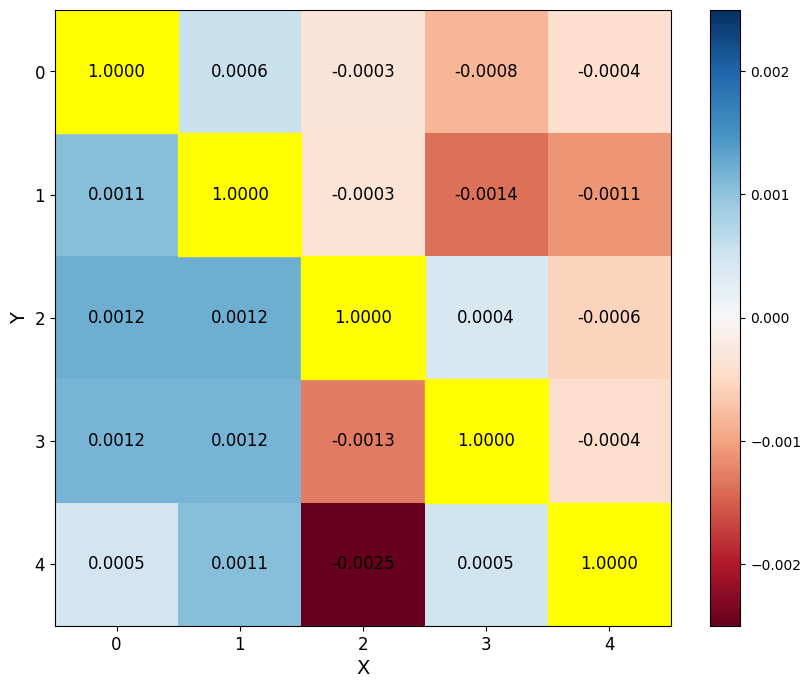

In [631]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

def plot_heatmap(data):
    # 将数据转换为numpy数组
    data = np.array(data)
    
    # 复制数据用于显示热图
    data_for_display = np.copy(data)
    
    # 创建掩码，仅保留非主对角线元素
    mask = np.eye(data.shape[0], dtype=bool)
    data_for_display[mask] = np.nan
    
    # 创建图形和子图，调整图形大小
    fig, ax = plt.subplots(figsize=(10, 8))  # 调整figsize参数来增加图像大小
    
    # 创建颜色映射
    cmap = plt.cm.RdBu
    
    # 根据数据范围规范化颜色映射，排除NaN值
    norm = mcolors.Normalize(vmin=-np.nanmax(np.abs(data_for_display)), vmax=np.nanmax(np.abs(data_for_display)))
    
    # 绘制热图，主对角线之外的部分
    cax = ax.imshow(data_for_display, cmap=cmap, norm=norm)
    
    # 添加颜色条
    fig.colorbar(cax)
    
    # 绘制主对角线部分
    for (i, j), val in np.ndenumerate(data):
        if i == j:
            ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, color='yellow'))
            ax.text(j, i, f'{val:.4f}', ha='center', va='center', color='black', fontsize=12)
        else:
            ax.text(j, i, f'{val:.4f}', ha='center', va='center', color='black', fontsize=12)
    
    # 设置轴标签
    ax.set_xlabel('X', fontsize=14)
    ax.set_ylabel('Y', fontsize=14)
    
    # 调整刻度标签的字体大小
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
    # 显示图表
    plt.show()

# 测试数据
coupler = [
    [1., 0.019101793163227933 , 0.007400970564034268, -0.006508453051829961  , -0.010415087536721896, -0.01233164690015178 , -0.012029863644126419, -0.01380905335010071 , -0.012368349658446206],
    [0., 1. , 0., 0.  , 0., 0. , 0., 0. , 0.],
    [0.023928106398805868, 0.07237848652466582   , 1., -0.03188100001681708    , -0.016610996569762837, -0.01981791892937278 , -0.015786691698146973, -0.018956270280269617 , -0.01443740180941646],
    [0., 0. , 0., 1.  , 0., 0. , 0., 0. , 0.],
    [0.017303387280268364, 0.021204202732861915   , 0.019667825293721183, 0.04394408110426139  , 1., -0.04739067570067405    , -0.020312672024662866, -0.017232972982063288 , -0.011956655206285012],
    [0., 0. , 0., 0.  , 0., 1. , 0., 0. , 0.],
    [0.019990248659192026, 0.021705116290011484   , 0.016587653142733808, 0.01735502930941727  , 0.019786266530016597, 0.043092751600656454  , 1., -0.062318998079111995    , -0.028125814973979476],
    [0., 0. , 0., 0.  , 0., 0. , 0., 1. , 0.],
    [0.016485464803359655, 0.013781434089534486   , 0.010903771995922922, 0.010534051935324211  , 0.010124931139071286, 0.003180266832144186  , -0.004398533822059109, 0.03339866078719304 , 1.],
]
first_crosstalk = [
    [1. , 0.00740  , -0.0104 , -0.0120 , -0.0124],
    [0.0239   , 1.    , -0.0166 , -0.0158 , -0.0144],
    [0.0173   , 0.0197  , 1.    , -0.0203 , -0.0120],
    [0.0200   , 0.0166  , 0.0198  , 1.    , -0.0281],
    [0.0168  , 0.0109  , 0.0101  , -0.00440 , 1.]]
crosstalk_after_second_compensation = [
    [1. , 0.0005660682516576603  , -0.00031351472399501187 , -0.0008380724334031946 , -0.0004190362167015973],
    [0.0010618126659081386   , 1.    , -0.0003380009657170537 , -0.0013752455795675105 , -0.0010948191593351951],
    [0.001210549070471281   , 0.001210549070471281  , 1.    , 0.0004085603112840573 , -0.0005500982318271263],
    [0.0011673151750973066   , 0.0011673151750973066  , -0.001300578034681826  , 1.    , -0.00044117647058824686],
    [0.00048638132295721114   , 0.0010700389105058644  , -0.0024987986544920005  , 0.00050583657587538997 , 1.],
]
data = crosstalk_after_second_compensation
# 生成并显示热图
plot_heatmap(data)


In [630]:
first_crosstalk = [
    [1. , 0.00740  , -0.0104 , -0.0120 , -0.0124],
    [0.0239   , 1.    , -0.0166 , -0.0158 , -0.0144],
    [0.0173   , 0.0197  , 1.    , -0.0203 , -0.0120],
    [0.0200   , 0.0166  , 0.0198  , 1.    , -0.0281],
    [0.0168  , 0.0109  , 0.0101  , -0.00440 , 1.]]
    
second_crosstalk = [[1. , 0.009258287321815351  , -0.00033964095099459616 , -0.007164150903785687 , -0.009606076401815496],
    [0.011588604538870916   , 1.    , 0.0007547576688768803 , -0.008105802047782131 , -0.0114626414460571],
    [0.00852442671984107   , 0.007080924855491822  , 1.    , -0.00988954533778426 , -0.006304985337242439],
    [0.011950748430710631   , 0.010864316755191483  , 0.003974484789008666  , 1.    , -0.010698689956330242],
    [0.009357454772300504   , 0.008733624454147139  , 0.005119453924914462  , -0.0030567685589520284 , 1.]]
second_compensation = [
    [ 9.99932194e-01, -9.42054002e-03,  2.69412505e-04,  7.11923796e-03,    9.57530594e-03],
    [-1.17836510e-02,  9.99927861e-01, -8.49201537e-04,  8.04733615e-03,    1.14293616e-02],
    [-8.61625928e-03, -7.16154703e-03,  9.99931608e-01,  9.78817844e-03,    6.24441612e-03],
    [-1.18865931e-02, -1.08149370e-02, -4.02305355e-03,  9.99819285e-01,    1.04332400e-02],
    [-9.24613032e-03, -8.64123769e-03, -5.12650575e-03,  2.86920567e-03,    9.99810504e-01]]
first_compensation = [
    [ 0.99956582, -0.00793288,  0.00990958,  0.0121566,   0.01270885],
    [-0.02475017,  0.9994467,   0.01588063,  0.01586771,  0.01475947],
    [-0.01740157, -0.01997843,  0.99897326,  0.01981986,  0.01199816],
    [-0.01968006, -0.01632376, -0.02052395,  0.99920908,  0.02737909],
    [-0.01611881, -0.01063648, -0.01054133,  0.00382096,  0.9996285 ]]
crosstalk_after_second_compensation = [
    [1. , 0.0005660682516576603  , -0.00031351472399501187 , -0.0008380724334031946 , -0.0004190362167015973],
    [0.0010618126659081386   , 1.    , -0.0003380009657170537 , -0.0013752455795675105 , -0.0010948191593351951],
    [0.001210549070471281   , 0.001210549070471281  , 1.    , 0.0004085603112840573 , -0.0005500982318271263],
    [0.0011673151750973066   , 0.0011673151750973066  , -0.001300578034681826  , 1.    , -0.00044117647058824686],
    [0.00048638132295721114   , 0.0010700389105058644  , -0.0024987986544920005  , 0.0005058365758753899 , 1.],
]
print(np.dot(second, first))

[[ 0.99943207 -0.01757111  0.00978139  0.01916183  0.02233885]
 [-0.03685474  0.99923211  0.01462874  0.02379113  0.0262439 ]
 [-0.02612893 -0.02729249  0.99843911  0.02940442  0.01829222]
 [-0.03138843 -0.02706607 -0.02493868  0.99867253  0.03744455]
 [-0.02511126 -0.01914199 -0.01594832  0.00633605  0.99921107]]
